Contents of this notebook were partially prepared by Dr. Edward Raff (2019)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


## First example is classification on Iris Dataset

In [2]:
data = datasets.load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
train_df, test_df= train_test_split(iris_df)  #default for shuffle is True
print(len(train_df),len(test_df))
#help(train_test_split)
display(train_df)

112 38


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
137,6.4,3.1,5.5,1.8,2.0
132,6.4,2.8,5.6,2.2,2.0
26,5.0,3.4,1.6,0.4,0.0
73,6.1,2.8,4.7,1.2,1.0
19,5.1,3.8,1.5,0.3,0.0
...,...,...,...,...,...
94,5.6,2.7,4.2,1.3,1.0
49,5.0,3.3,1.4,0.2,0.0
58,6.6,2.9,4.6,1.3,1.0
63,6.1,2.9,4.7,1.4,1.0


In [7]:
tree = DecisionTreeClassifier(max_depth=100)
#DecisionTreeClassifier(criterion='entropy')   #default criterion is 'gini'
#help(DecisionTreeClassifier)
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(max_depth=100)

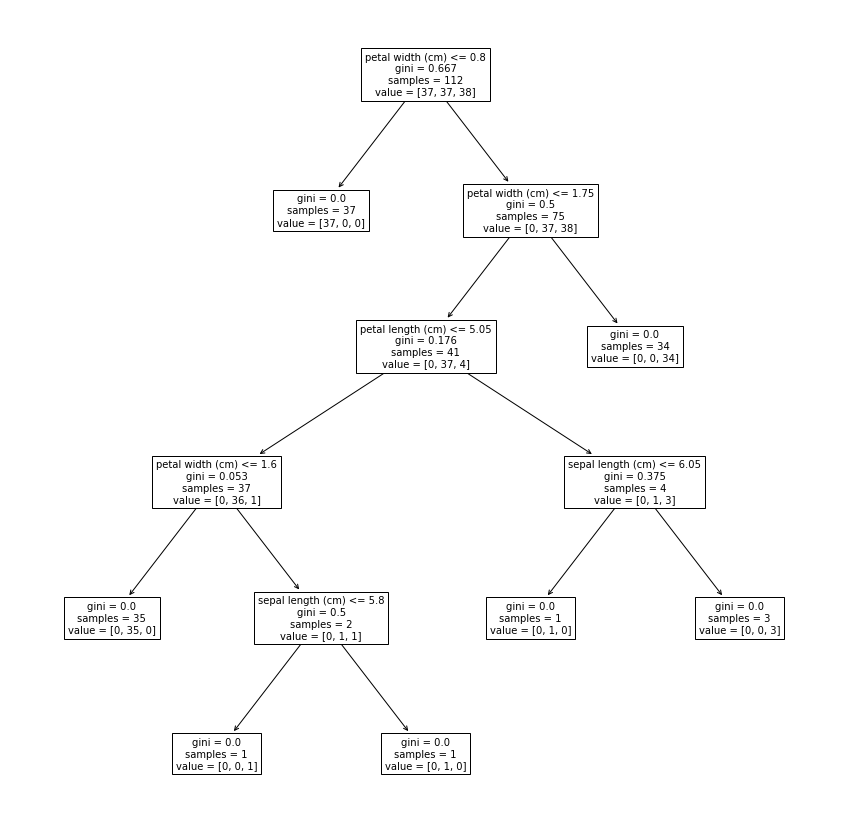

In [8]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

Accuracy on training set?

In [9]:
sum(tree.predict(train_df.drop('target',axis=1))==train_df['target'])

112

We are not surprised by 100% accuracy on the training set, because we did not limit the tree depth or min no of samples in a split.

What about the accuracy on test set?

In [10]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

36

In [11]:
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]], dtype=int64)

In [12]:
tree.feature_importances_
#The feature importances (in the given order). 
#The higher, the more important the feature.
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

array([0.03348481, 0.        , 0.05054286, 0.91597232])

In [13]:
mat=tree.decision_path(test_df.iloc[14].drop('target').values.reshape(1,-1))
print(test_df.iloc[14].drop('target'))
print(mat)

sepal length (cm)    5.1
sepal width (cm)     3.8
petal length (cm)    1.9
petal width (cm)     0.4
Name: 44, dtype: float64
  (0, 0)	1
  (0, 1)	1


In [14]:
tree.predict(test_df.drop('target',axis=1))==test_df['target']

128     True
20      True
124     True
98      True
32      True
27      True
105     True
119    False
69      True
90      True
104     True
85      True
147     True
84      True
44      True
50      True
56      True
140     True
5       True
34      True
70     False
80      True
145     True
39      True
31      True
114     True
79      True
17      True
103     True
30      True
113     True
65      True
121     True
1       True
75      True
13      True
40      True
60      True
Name: target, dtype: bool

## Regression on Boston House Dataset

In [15]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
housing_train_df, housing_test_df = train_test_split(housing_df)

In [16]:
housing_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6
334,0.03738,0.0,5.19,0.0,0.515,6.310,38.5,6.4584,5.0,224.0,20.2,389.40,6.75,20.7
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72,24.8
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43,24.3
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


In [17]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [18]:
mean_squared_error(tree_reg.predict(housing_train_df.drop('target',axis=1)), housing_train_df['target'])

12.900835092464462

In [19]:
mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])

15.222699436646037

In [20]:
tree_reg.score(housing_train_df.drop('target',axis=1), housing_train_df['target'])

0.8541526915676498

In [21]:
tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])

0.788665691255315

Remember, score increases with a better model, whereas MSE decreases.

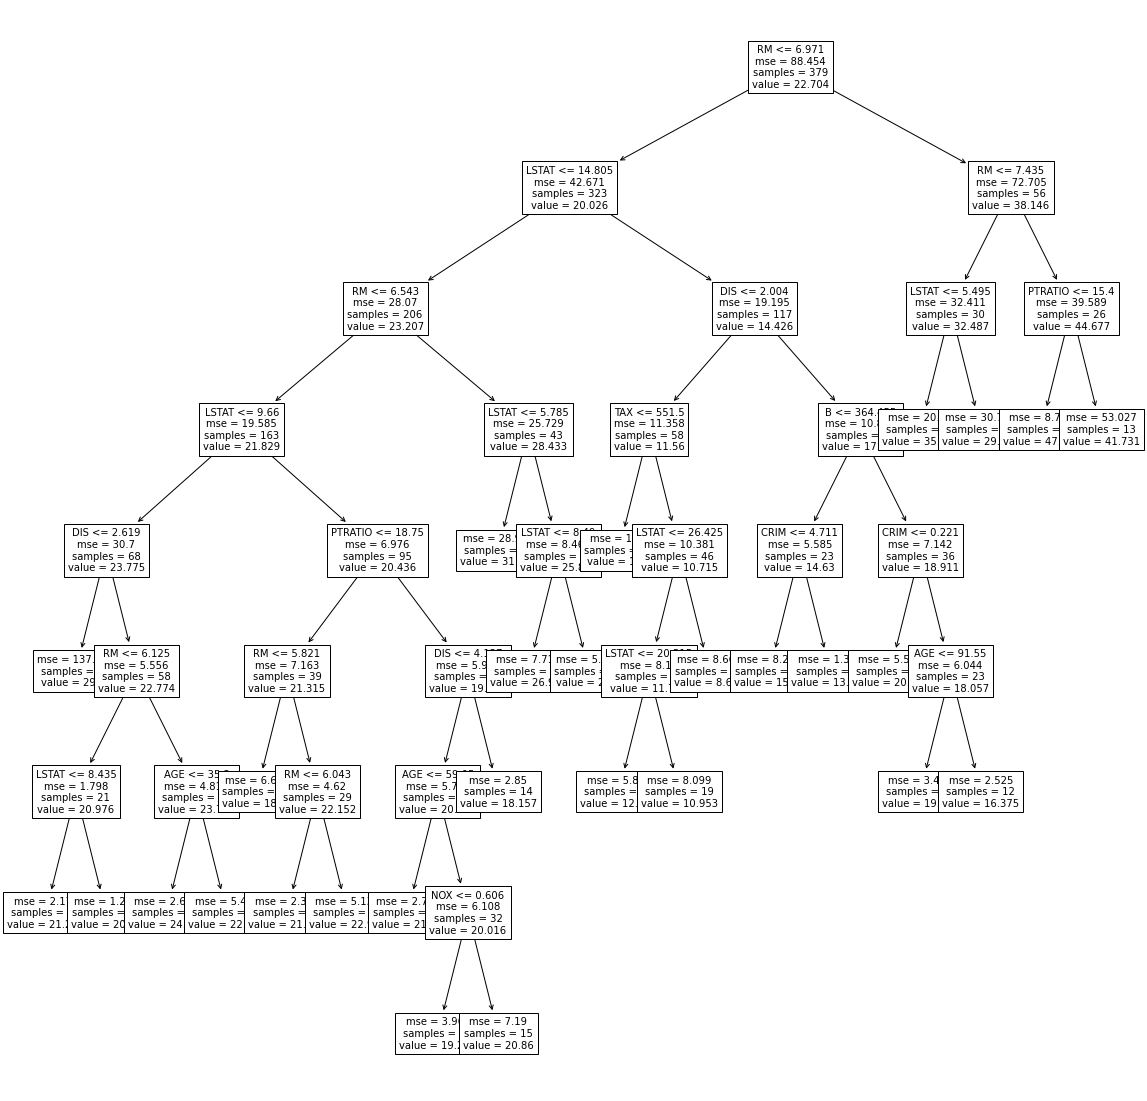

In [22]:
pyplot.figure(figsize=(20,20))
tr.plot_tree(tree_reg, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

### Regularization in DTs
In DTs, instead of incorporating penalties into the cost function, overfitting is controlled with a variety of hyperparameters such as maximum tree depth (`max_depth`) or number of samples needed for a split to be possible (`min_samples_split`).

You'll need to follow best practices for determining the values of these hyperparameters.

Let's check our last models performance on test set for varying (`max_depth`).

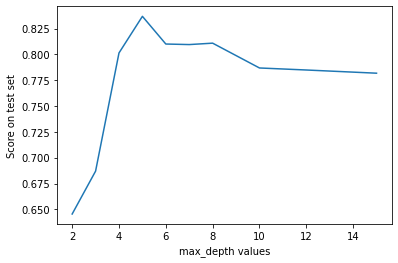

In [23]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
errors = np.zeros(10)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])
    errors[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

## Another Regression Example with Regularization

This time let's use one feature and visualize the fitting model.

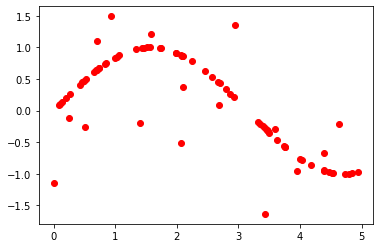

In [24]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  #spreads 80 random points from [0,1] to [0,5] range.
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # this line adds noise

pyplot.plot(X,y, 'ro')
pyplot.show()

Lets fit a DT Regressor:

In [25]:
X_testvals = np.arange(0,5,0.01).reshape(-1,1)

tree=DecisionTreeRegressor(criterion='squared_error') #, max_depth=3) #squared_error is actually default value
dtr_yhat = tree.fit(X,y).predict(X_testvals)
#help(DecisionTreeRegressor())
pyplot.plot(X,y, 'ro')
pyplot.plot(X_testvals, dtr_yhat, 'g--')
pyplot.legend(['Training Data', 'Tree on Test'], loc='upper right')
pyplot.show()

KeyError: 'squared_error'

It looks like an 'overfit'. Also you can see the tree nodes below. Lets try to limit depth of the tree to 3.

In [ ]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, fontsize=10)
pyplot.show()

# Homework #3 (due 2nd of July, 11:59 PM):

### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes).
- Use box plots to look at the data. 
- Create a training and test set (with shuffling).
- Train a decision tree classifier using the training set.
- What are the top 5 most important (discriminative) features?
- Train a logistic regression model using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.

### Part 2)

- Use the provided *winequality_white.csv* as your data. Last column (quality) is the target variable.
- Do not forget to shuffle and split (Train/test) your data.
- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.


In [ ]:
data1 = datasets..load_breast_cancer()